<a href="https://colab.research.google.com/github/varnikaaavyas/Time-Series-Analysis/blob/main/ARIMA_Forecasting_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**QUESTION 1.**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import kpss

In [ ]:
data = pd.read_csv("/content/daily-total-female-births.csv", names=['values'],header=0)
data.head()

,values
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


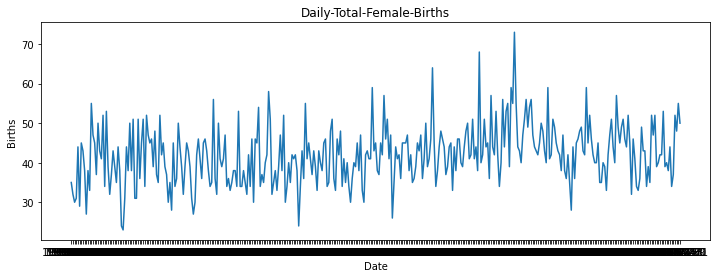

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(data)
plt.xlabel('Date')
plt.ylabel('Births')
plt.title('Daily-Total-Female-Births')
plt.show()

In [ ]:
def adk_kpss(series):

  result = adfuller(series, autolag= 'AIC')
  print("Result of ADF")
  print(f'ADF Statistics: {result[0]}')
  print(f'n-lags: {result[1]}')
  print(f'p_value:{result[1]}')
  for key, value in result[4].items():
    print('Critical Values:')
    print(f'{key},{value}')

  if(result[1]>0.05):
    print("Non-Stationary")
  else:
    print("Stationary")



In [ ]:
result = adk_kpss(data)
# since , data is stationary value of d is Zero

Result of ADF
ADF Statistics: -4.808291253559765
n-lags: 5.2434129901498554e-05
p_value:5.2434129901498554e-05
Critical Values:
1%,-3.448748905151901
Critical Values:
5%,-2.8696473721448728
Critical Values:
10%,-2.5710891239349585
Stationary


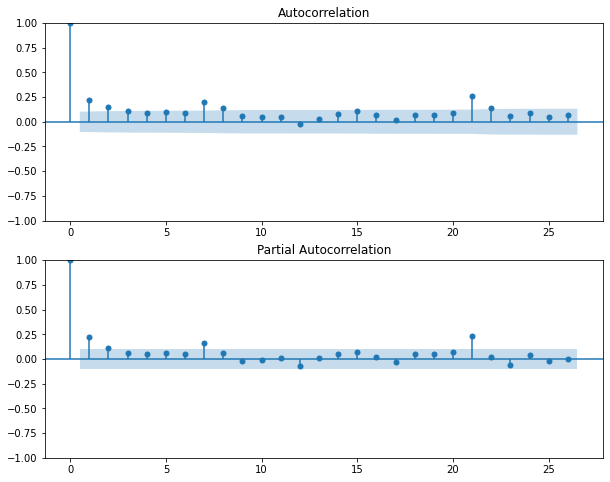

In [ ]:
import warnings
warnings.filterwarnings('ignore')
fig, ax  = plt.subplots(2,1, figsize=(10,8))

plot_acf(data, ax=ax[0])
plot_pacf(data, ax = ax[1])
plt.show()

**Since, data is stationary Value of d=0** \
**p = 1 from pacf_plot** \
**q = 2 from acf_plot**



**QUESTION 2.**

In [ ]:

import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima.model import ARIMA

# Build the model
train = data.values[:70]
test = data.values[70:]
model = ARIMA(train, order=(1,0,2))
fitted = model.fit()
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   70
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -239.919
Date:                Tue, 21 Mar 2023   AIC                            489.837
Time:                        04:42:20   BIC                            501.080
Sample:                             0   HQIC                           494.303
                                 - 70                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.8097      1.250     31.855      0.000      37.360      42.259
ar.L1          0.2371      0.704      0.337      0.736      -1.143       1.617
ma.L1         -0.1844      0.698     -0.264      0.7

In [ ]:
predictions = fitted.forecast(steps=len(test))


from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test, predictions)
print("Mean Squared Error: ", mse)

Mean Squared Error:  58.92481477208585


In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 22.7 MB/s eta 0:00:00


In [ ]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
model= pm.auto_arima(data['values'],start_P=1,start_Q=1,test ='adf',max_P=3,max_Q=3,m=1,d=None,error_action= 'ignore',suppress_warnings=True,stepwise=True, seasonal=False, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=1.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3776.976, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2656.891, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=3407.164, Time=0.26 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.20 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2474.496, Time=0.47 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2471.358, Time=0.98 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=2472.653, Time=1.17 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2471.853, Time=0.97 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.53 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=3.42 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2474.346, Time=1.59 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0]          
Total fit time: 10.823 seconds
                               SARIMAX Results                                
Dep. Variable:              

In [ ]:
predictions = fitted.forecast(30)
print(predictions)

[39.77021675 40.87256952 40.06172816 39.86946115 39.82387073 39.81306031
 39.81049694 39.80988911 39.80974498 39.80971081 39.8097027  39.80970078
 39.80970033 39.80970022 39.80970019 39.80970019 39.80970019 39.80970019
 39.80970019 39.80970019 39.80970019 39.80970019 39.80970019 39.80970019
 39.80970019 39.80970019 39.80970019 39.80970019 39.80970019 39.80970019]
